# STATS 542: Homework 2

<h4><center> Diego Kleiman (diegoek2) </center></h4>
<h4><center> Due: Monday 11:59 PM CT, Feb 16th </center></h4>

## About HW2

For this HW, we mainly try to understand the KNN method in both classification and regression settings and use it to perform several real data examples. Tuning the model will help us understand the bias-variance trade-off. A slightly more challenging task is to code a KNN method yourself. For that question, you cannot use any additional package to assist the calculation. 

There is an important package, `ElemStatLearn`, which is the package associated with the ESL textbook for this course. Unfortunately the package is currently discontinued on CRAN. You can install an earlier version of this package by using 

```r
  require(devtools)
  install_version("ElemStatLearn", version = "2015.6.26.2", repos = "http://cran.us.r-project.org")
```
And of course you will have to install the `devtools` package if you don't already have it. 

In [1]:
# Random seed to be used throughout the HW (the seed must be supplied for every function call involving a RNG)
seed = 1

## Question 1 [20 Points] KNN Classification (Diabetes)

Load the Pima Indians Diabetes Database (`PimaIndiansDiabetes`) from the `mlbench` package. If you don't already have this package installed, use the following code. It also randomly split the data into training and testing. You should preserve this split in the analysis. 

```r
  # install.packages("mlbench") # run this line if you don't have the package
  library(mlbench)
  data(PimaIndiansDiabetes)

  set.seed(2)
  trainid = sample(1:nrow(PimaIndiansDiabetes), nrow(PimaIndiansDiabetes)/2)
  Diab.train = PimaIndiansDiabetes[trainid, ]
  Diab.test = PimaIndiansDiabetes[-trainid, ]
```

Read the documentation of this dataset [here](https://cran.r-project.org/web/packages/mlbench/mlbench.pdf) and make sure that you understand the goal of this classification problem. 

Use a grid of $k$ values (every integer) from 1 to 20. Fit the KNN model using `Diab.train` and calculate both training and testing errors. For the testing error, use `Diab.test`. Plot the two errors against the corresponding $k$ values. Make sure that you differentiate them using different colors/shapes and add proper legends. Does the plot match (approximately) our intuition of the bias-variance trade-off in terms of having an U-shaped error? What is the optimal $k$ value based on this result?

In [2]:
# Get data and split into training and testing set
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

np.random.seed(seed)

# Since I'm using Python I sourced the data from: https://www.kaggle.com/uciml/pima-indians-diabetes-database (the source is UCI, same as for the R package)
data = pd.read_csv('diabetes.csv')
X_train, X_test, y_train, y_test = train_test_split(data.drop('Outcome', axis=1), 
                                                    data.Outcome, 
                                                    test_size=0.5, 
                                                    train_size=0.5, 
                                                    random_state=seed
                                                   )

In [3]:
# Check that data was split as desired
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
555,7,124,70,33,215,25.5,0.161,37
142,2,108,52,26,63,32.5,0.318,22
618,9,112,82,24,0,28.2,1.282,50
6,3,78,50,32,88,31.0,0.248,26
267,2,128,64,42,0,40.0,1.101,24
...,...,...,...,...,...,...,...,...
645,2,157,74,35,440,39.4,0.134,30
715,7,187,50,33,392,33.9,0.826,34
72,13,126,90,0,0,43.4,0.583,42
235,4,171,72,0,0,43.6,0.479,26


In [4]:
y_train

555    0
142    0
618    1
6      1
267    0
      ..
645    0
715    1
72     1
235    1
37     1
Name: Outcome, Length: 384, dtype: int64

In [5]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
285,7,136,74,26,135,26.0,0.647,51
101,1,151,60,0,0,26.1,0.179,22
581,6,109,60,27,0,25.0,0.206,27
352,3,61,82,28,0,34.4,0.243,46
726,1,116,78,29,180,36.1,0.496,25
...,...,...,...,...,...,...,...,...
574,1,143,86,30,330,30.1,0.892,23
379,0,93,100,39,72,43.4,1.021,35
191,9,123,70,44,94,33.1,0.374,40
414,0,138,60,35,167,34.6,0.534,21


In [6]:
y_test

285    0
101    0
581    0
352    0
726    0
      ..
574    0
379    0
191    0
414    1
343    0
Name: Outcome, Length: 384, dtype: int64

In [7]:
from sklearn.neighbors import KNeighborsClassifier

train_errors = []
test_errors = []
k_values = np.arange(1, 21) # k from 1 to 20

for i in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    predictions_train = knn_model.predict(X_train)
    predictions_test = knn_model.predict(X_test)
    train_error = np.mean(np.square(y_train-predictions_train))
    test_error = np.mean(np.square(y_test-predictions_test))
    train_errors.append(train_error)
    test_errors.append(test_error)

train_errors = np.asarray(train_errors)
test_errors = np.asarray(test_errors)

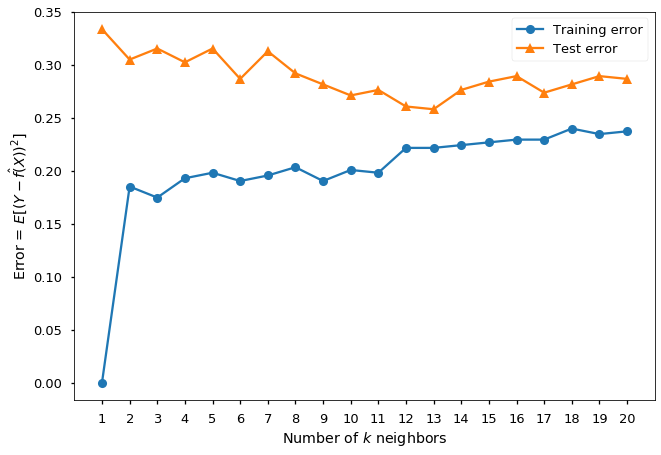

In [8]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-talk')

plt.plot(k_values, train_errors, "o-")
plt.plot(k_values, test_errors, "^-")
plt.xticks(k_values)
plt.xlim(0, 21)
plt.xlabel("Number of $k$ neighbors")
plt.ylabel("Error = $E[(Y-f\hat(X))^2]$")
plt.legend(["Training error", "Test error"])
plt.show()

Note: the training error for $k=1$ is $0$.

Does the plot match (approximately) our intuition of the bias-variance trade-off in terms of having an U-shaped error?

**Answer**: Yes, it does. We expect that the bias will be low and the variance will be high for lower numbers of $k$. We can see this because the model overfits the training data but scores very poorly on the test set for those values. As we increase $k$, the number of degrees of freedom decreases, which yields a lower variance but a higher bias. We can observe sort of a U-shape in the test error (because the minimum is in the middle). This curves shows that the variance does not improve for $k > 13$.

What is the optimal $k$ value based on this result?

**Answer**: The optimal value for $k$, according to my computation, is 13 because at this point the test error is the minimum.

In [9]:
k_values[test_errors.argmin()] # This is to check which k value gives the smallest test error

13

## Question 2 [20 Points] KNN Classification (Handwritten Digit)

Load the Handwritten Digit Data (`zip.train` and `zip.test`) from the `ElemStatLearn` package. Use a grid of $k$ values (every integer) from 1 to 20. And we need to select the best tuning using the `caret` package. To perform this automatic tuning, you need to 

  * Specify the type of cross-validation using the `trainControl()` function. We need to use 3 fold cross-validation.
  * Specify a grid of tuning parameters. This can be done using `expand.grid(k = c(1:20))`
  * Train the cross-validation using the `train()` function

For details, read the documentation at [here](https://topepo.github.io/caret/model-training-and-tuning.html) to learn how to use the `trainControl()` and `train()` functions. Some examples can also be found at [here](https://cran.r-project.org/web/packages/caret/caret.pdf). Apply the function to the `zip.train` data with our choice of $k$ grid. 

Fit the KNN model using **a randomly selected subset of `zip.train`, with size 500** as the training data and calculate both training and testing errors. Make sure to set random seed so that your result can be replicated. Plot the two errors against the corresponding $k$ values. Make sure that you differentiate them using different colors/shapes and add proper legends. What is the optimal $k$ value? Does the plot match our intuition of the bias-variance trade-off in terms of having an U-shaped error? If not, which theoretical result we introduced in the lecture can be used to explain it? Provide your explanation of the results. 

**Notes about adapting this exercise for Python:**
- I will use the package [rpy2](https://rpy2.github.io/doc/latest/html/index.html) to convert the datasets `zip.train` and `zip.test` to numpy format
- I will use the [sklearn.model_selection](https://scikit-learn.org/stable/model_selection.html) package for tuning parameters

In [10]:
import os
os.environ['R_HOME'] = "/Users/diegoeduardo/opt/anaconda3/envs/R/lib/R"

In [11]:
import rpy2.robjects as robjects

# Load datasets
robjects.r['load']('zip.train.RData')
robjects.r['load']('zip.test.RData')

# Retrieve datsets as Python objects
zip_train = robjects.r['zip.train']
zip_test = robjects.r['zip.test']

# Convert to numpy.ndarray
zip_train = np.array(zip_train)
zip_test = np.array(zip_test)

In [12]:
# Instantiate cross-validator and parameter search 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

kfold = KFold(n_splits=3) 
k_values = {'n_neighbors': np.arange(1, 21)}
searcher = GridSearchCV(estimator=KNeighborsClassifier(), 
                        param_grid=k_values, 
                        scoring='neg_mean_squared_error', # negated mean squared error
                        cv=kfold,
                        return_train_score=True
                       )

In [13]:
# Shuffle train data and sample 500 random datapoints 

np.random.seed(seed)

zip_train_shuffled = zip_train 
np.random.shuffle(zip_train_shuffled) # Shuffle in place
zip_train_shuffled = zip_train_shuffled[:500] # Take 500 (random) samples
X_train, y_train = zip_train_shuffled[:, 1:], zip_train_shuffled[:, 0]

# Reshape test data
X_test, y_test = zip_test[:, 1:], zip_test[:, 0]

In [14]:
searcher.fit(X_train, y=y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             return_train_score=True, scoring='neg_mean_squared_error')

In [15]:
train_error = -searcher.cv_results_['mean_train_score'] 
validation_error = -searcher.cv_results_['mean_test_score'] # Note: this is the error from the 3-fold cross-validation

In [16]:
# Compute test error 
test_error = []

# Here I score the model against the test data for each k value 
# To get the appropriate models, I have to fit the model again using 3-fold cross-validation but providing only one value of k for the grid search so that I get each model (otherwise GridSearchCV only returns the best model) 
for i in np.arange(1, 21):
    k_values_temp = {'n_neighbors': [i]}
    searcher = GridSearchCV(estimator=KNeighborsClassifier(), 
                            param_grid=k_values_temp, 
                            scoring='neg_mean_squared_error', # negated mean squared error
                            cv=kfold,
                            return_train_score=False # no need to compute training score again
                           ) 
    searcher.fit(X_train, y=y_train)
    test_error.append(-searcher.score(X_test, y=y_test))

test_error = np.asarray(test_error)

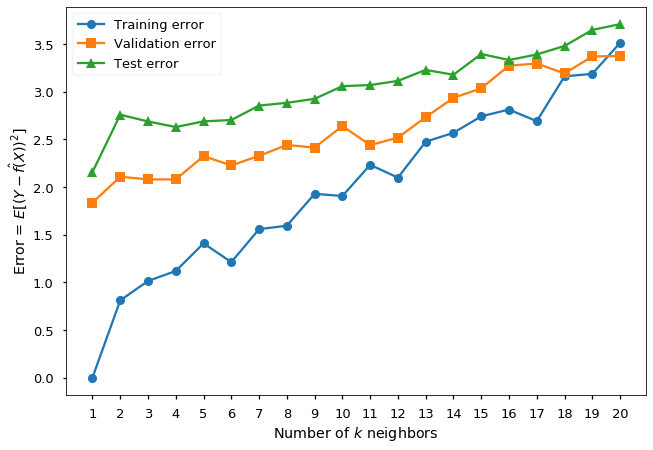

In [17]:
x = np.arange(1, 21)
plt.plot(x, train_error, "o-")
plt.plot(x, validation_error, "s-")
plt.plot(x, test_error, "^-")
plt.xticks(x)
plt.xlabel("Number of $k$ neighbors")
plt.ylabel("Error = $E[(Y-f\hat(X))^2]$")
plt.legend(["Training error", "Validation error", "Test error"])

plt.show()
plt.close()

What is the optimal $k$ value?

**Answer**: According to our cross-validation scheme, $k=1$ is the optimal value (see validation error). The testing error verifies that our best model also has the best performance on the testing set. Accordingly, we would conclude that $k=1$ is the correct answer.

Does the plot match our intuition of the bias-variance trade-off in terms of having an U-shaped error?

**Answer**: No. We do not see an U-shaped curve in the validation and test errors. The shape we observe arises from the fact that bias is low for small values of $k$, and there is no much variance in the dataset. Therefore, we find that $k=1$ is the optimal value because it minimizes the bias. In other words, we see that errors increase as we increase $k$ due to the bias that we introduce as we use more and more neighbors without the benefit of a decrease in the variance.

If not, which theoretical result we introduced in the lecture can be used to explain it?

**Answer**: In the curves for validation and testing error, we can see that small values of $k$ achieve the smallest errors in this bias-variance tradeoff example. This is due to the fact that the dataset probably exists in some lower dimensional manifold because the samples that belong to the same group are clustered together. Consequently, the dataset can be efficiently classified by a model with low inherent bias (KNN classifier with small $k$), given that the variance is not a significant source of error.

## Question 3 [40 Points] Write your own KNN for regression

For this question, you __cannot__ use (load) any additional `R` package. Complete the following steps. 

a. [25 points] Generate the covariate of $n = 1000$ training data, with $p=5$ from independent standard Normal distribution. Then, generate $Y$ from 
  $$ Y = X_1 + 0.5 \times X_2 - X_3 + \epsilon,$$
  with i.i.d. standard normal error $\epsilon$. Write a function `myknn(xtest, xtrain, ytrain, k)` that fits a KNN model and predict multiple target points `xtest`. Here `xtrain` is the training dataset covariate value, `ytrain` is the training data outcome, and `k` is the number of nearest neighbors. Use the euclidean distance to evaluate the closeness between two points.

Test your code using the first 500 observations as the training data and the rest as testing data. Predict the $Y$ values using your KNN function with `k = 5`. Evaluate the prediction accuracy using mean squared error
$$\frac{1}{N}\sum_i (y_i - \widehat y_i)^2$$

b. [15 Points] Consider $k$ being all integers from 1 to 10. Use the degrees of freedom as the horizontal axis. Demonstrate your results in a single, easily interpretable figure with proper legends. What is your optimal tuning parameter and the associated degrees of freedom?

**Notes about adapting this exercise for Python:**
- I will use the package numpy because, unlike R, Python does not offer native support for matrices and matrix operations

In [18]:
import numpy as np

np.random.seed(seed)

# Generate data
X = np.random.normal(0, 1, (1000, 5))
A = np.asarray([1, 0.5, -1])
y = np.matmul(X[:,:3], A) + np.random.normal(0, 1, (1000))

In [19]:
def myknn(xtest, xtrain, ytrain, k):
    '''
    Fits a K-nearest neighbors regression model using k neighbors to the dataset (xtrain, ytrain) 
    and returns the predictions on xtest.
    
    Args
    ---
        xtest (np.ndarray): test dataset with shape (n_samples, n_features)
        xtrain (np.ndarray): train dataset with shape (n_samples, n_features)
        ytrain (np.ndarray): train outcomes with shape (n_samples, 1)
        k (int): number of neighbors for KNN estimator
    
    Returns
    ---
        predictions (np.ndarray): outcomes for test dataset with shape (n_samples, 1)
        train_error (np.float64): mean squared error from training dataset
    '''
    # Compute pairwise distances
    distances = helper_distances(xtrain, xtrain)
    
    # Find closest neighbors and "fit" model
    n_samples = xtrain.shape[0]
    predictions_train = np.empty(n_samples)
    for i in range(n_samples):    
        indices = helper_closest_k_points(distances[i], k)
        outcomes = ytrain[indices]
        predictions_train[i] = outcomes.mean()
    
    train_error = helper_mean_squared_error(ytrain, predictions_train)
    
    # Compute predictions for test data
    distances = helper_distances(xtest, xtrain)
    n_samples = xtest.shape[0]
    predictions = np.empty(n_samples)
    for i in range(n_samples):    
        indices = helper_closest_k_points(distances[i], k)
        outcomes = ytrain[indices]
        predictions[i] = outcomes.mean()
    
    return predictions, train_error
    
def helper_distances(m1, m2):
    '''
    Computer all pairwise distances between points in matrices m1 and m2.
    
    Args
    ---
        m1 (np.ndarray): array with shape (m, p)
        m2 (np.ndarray): array with shape (n, p)
    
    Returns
    ---
        distances (np.ndarray): array with shape (m, n). 
        
        distances[i, j] is the pairwise distance between point i in m1 and 
        point j in m2 for i between 0 and m-1 and j between 0 and n-1
    '''
    size_1 = m1.shape[0]
    size_2 = m2.shape[0]
    
    distances = np.empty((size_1, size_2))
    
    for i in range(size_1):
        for j in range(size_2):
            distances[i, j] = np.sqrt(np.sum((m1[i] - m2[j])**2))
    
    return distances

def helper_closest_k_points(d, k):
    '''
    Return indices of k smallest distances found in array d of shape (1, n_features).
    '''
    return np.argsort(d)[:k]

def helper_mean_squared_error(outcomes, predictions):
    '''
    Return mean squared error metric.
    '''
    return np.mean((outcomes-predictions)**2)
    

In [20]:
indices = np.arange(1000)
np.random.shuffle(indices)
train_set = indices[:500]
test_set = indices[500:]

X_train, y_train = X[train_set], y[train_set]
X_test, y_test = X[test_set], y[test_set]
k = 5

predictions, train_error = myknn(X_test, X_train, y_train, k)
test_error = helper_mean_squared_error(predictions, y_test)

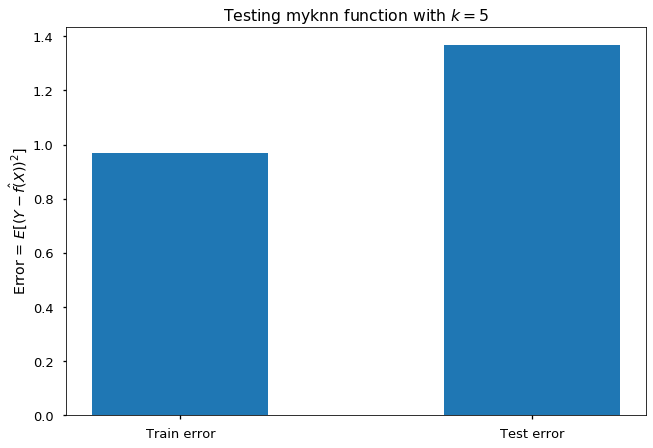

In [21]:
plt.bar([0, 1], [train_error, test_error], 0.5)
plt.xticks(ticks=[0 ,1], labels=["Train error", "Test error"])
plt.ylabel("Error = $E[(Y-f\hat(X))^2]$")
plt.title("Testing myknn function with $k=5$")
plt.show()
plt.show()

For part (b) I am using the expression $d_f = \frac{n}{k}$ to comptute the degrees of freedom where $n$ is the number of samples and $k$ is the number of neighbors.

In [22]:
k_values = np.arange(1, 11)

train_errors = np.empty(10)
test_errors = np.empty(10)

for k in k_values:
    predictions, train_error = myknn(X_test, X_train, y_train, k)
    test_error = helper_mean_squared_error(y_test, predictions)
    train_errors[k-1] = train_error
    test_errors[k-1] = test_error

n = X_test.shape[0]
df = n/k_values

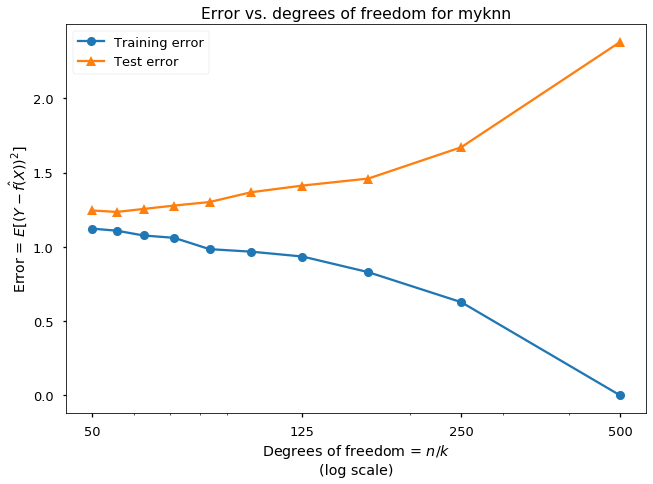

In [23]:
plt.plot(df, train_errors, "-o")
plt.plot(df, test_errors, "-^")
plt.xscale('log')
plt.xticks([50, 125, 250, 500], labels=[50, 125, 250, 500])
plt.xlabel("Degrees of freedom = $n/k$ \n(log scale)")
plt.ylabel("Error = $E[(Y-f\hat(X))^2]$")
plt.legend(["Training error", "Test error"])
plt.title("Error vs. degrees of freedom for myknn")
plt.show()
plt.close()

In [24]:
k_values[test_errors.argmin()]

9

What is your optimal tuning parameter and the associated degrees of freedom?

**Answer:** The optimal parameter, according to the test data, is $k=9$ which corresponds to ~55.56 degrees of freedom. We can notice that as we increase the degrees of freedom, the overfitting becomes apparent as the training error goes to zero and the test error increases. 

# Question 4 [20 Points] Curse of Dimensionality

Let's consider a high-dimensional setting. Keep the model the same as question 3. We consider two cases that both generate an additional set of 95 covariates:

  * Generate another 95-dimensional covariate with all independent standard Gaussian entries
  * Generate another 95-dimensional covariate using the formula $X^T A$, where $X$ is the original 5-dimensional vector, and $A$ is a $5 \times 95$ dimensional (fixed) matrix that remains the same for all observations. You should generate $A$ only once using i.i.d. uniform $[0, 1]$ entries.

Make sure that you set seed when generating these covariates. Fit KNN in both settings (with the total of 100 covariates) and select the best $k$ value. Answer the following questions

  * For each setting, what is the best $k$ and the best mean squared error for prediction?
  * In which setting $k$NN performs better? Should this be expected? Why?

In [25]:
import numpy as np

np.random.seed(seed)

# Generate (new) data
X_gaussian = np.append(X, np.random.normal(0, 1, (1000, 95)), axis=1) # Adding 95 new covariates to X
A = np.random.uniform(size=(5, 95))
X_matrix = np.append(X, np.matmul(X, A), axis=1) # It's not necessary to transpose X here because the convention in Python is to have matrices in row-vector format

Now I have `X_gaussian` and `X_matrix` with shapes (1000, 100), where 1000 is the number of samples and 100 is the number of features. The first 5 features are common for both datasets because they're from question 3. I will split the data into test and training sets as in question 3 to find the optimal $k$ parameter.

In [26]:
indices = np.arange(1000)
np.random.shuffle(indices)
train_set = indices[:500]
test_set = indices[500:]

X_train_gaussian, y_train = X_gaussian[train_set], y[train_set] # y is the same as for question 3
X_test_gaussian, y_test = X_gaussian[test_set], y[test_set]

X_train_matrix = X_matrix[train_set] # there's no need to set y again, it's the same for both datasets
X_test_matrix = X_matrix[test_set]

In [27]:
k_values = np.arange(1, 11)

train_errors_gaussian = np.empty(10)
train_errors_matrix = np.empty(10)
test_errors_gaussian = np.empty(10)
test_errors_matrix = np.empty(10)

for k in k_values:
    predictions_gaussian, train_error_gaussian = myknn(X_test_gaussian, X_train_gaussian, y_train, k)
    predictions_matrix, train_error_matrix = myknn(X_test_matrix, X_train_matrix, y_train, k)
    
    test_error_gaussian = helper_mean_squared_error(y_test, predictions_gaussian)
    test_error_matrix = helper_mean_squared_error(y_test, predictions_matrix)
    
    train_errors_gaussian[k-1] = train_error_gaussian
    train_errors_matrix[k-1] = train_error_matrix
    
    test_errors_gaussian[k-1] = test_error_gaussian
    test_errors_matrix[k-1] = test_error_matrix

n = X_test.shape[0]
df = n/k_values

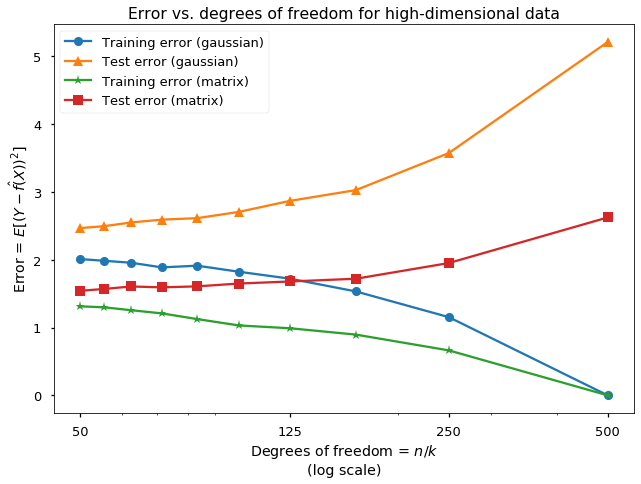

In [28]:
plt.plot(df, train_errors_gaussian, "-o")
plt.plot(df, test_errors_gaussian, "-^")
plt.plot(df, train_errors_matrix, "-*")
plt.plot(df, test_errors_matrix, "-s")
plt.xscale('log')
plt.xticks([50, 125, 250, 500], labels=[50, 125, 250, 500])
plt.xlabel("Degrees of freedom = $n/k$ \n(log scale)")
plt.ylabel("Error = $E[(Y-f\hat(X))^2]$")
plt.legend(["Training error (gaussian)", "Test error (gaussian)", "Training error (matrix)", "Test error (matrix)"])
plt.title("Error vs. degrees of freedom for high-dimensional data")
plt.show()
plt.close()

For each setting, what is the best $k$ and the best mean squared error for prediction?

**Answer:** The optimum is $k=10$ for the data derived from the matrix $A$. The optimum is also $k=10$ for the data generated from the Gaussian distribution. The optimal mean squared errors are $1.51$ (matrix data) and $2.83$ (Gaussian data). I've printed the values below for verification.

In [29]:
print("Optimal error for Gaussian data:", test_errors_gaussian[test_errors_gaussian.argmin()].round(2)) 
print("Optimal k for Gaussian data:", k_values[test_errors_gaussian.argmin()]) 

Optimal error for Gaussian data: 2.47
Optimal k for Gaussian data: 10


In [30]:
print("Optimal error for matrix data:", test_errors_matrix[test_errors_matrix.argmin()].round(2)) 
print("Optimal k for matrix data:", k_values[test_errors_matrix.argmin()]) 

Optimal error for matrix data: 1.54
Optimal k for matrix data: 10


In which setting $k$NN performs better? Should this be expected? Why?

**Answer:** KNN performs better for the data generated by the matrix. This should be expected because the way we generated the data implies that it can be projected into a lower-dimensional subspace with 5 dimensions. Given that we followed a simple linear transformation to obtain the 95 additional covariates, these extra features do not introduce much variance to the sample, so we can use a model with a low inherent bias (KNN) to efficiently model the data.